<h1 align="center">MOM6 diagnostics for EPBL single column wind+warming test case</h1> 

 Results from this notebook: 
1. Basic diagnostics of EPBL boundary layer and prognostic fields, comparing various vertical resolution results. 

Assumptions regarding this notebook:
0. Use of Python 3 or more recent. 
1. This notebook is written for the MOM6-examples/ocean_only/CVMix SCM tests.  
2. This notebook makes use of four simulations, each with differing vertical grid spacing.
   The uniform grid spacings are dz=40cm,1m,10m, enabled via NK=1000,400,40 inside MOM_inputs.
   The nonuniform grid is based on the OM4 grid, enabled via setting NK=75, MAXIMUM_DEPTH=6500.0,
   and ALE_COORDINATE_CONFIG = "FILE:vgrid_75_2m.nc,dz", where vgrid_75_2m.nc is located in 
   MOM6-examples/ice_ocean_SIS2/OM4_025/INPUT.

Hopes for the use of this notebook: 
1. To provide a starting point to document single column model tests;
2. To illustrate a self-contained iPython notebook of use for MOM6 analysis.  

This iPython notebook was originally developed at NOAA/GFDL, and it is provided freely to the MOM6 community. GFDL scientists developing MOM6 make extensive use of Python for diagnostics. We solicit modifications/fixes that are useful to the MOM6 community.

In [1]:
import numpy
import scipy.io.netcdf
import matplotlib.pyplot as plt
%pylab inline
pylab.rcParams['figure.figsize'] = (16.0, 4.0)

expt_name = 'skin_warming_wind_EPBL'

fname_A1 = './EPBL/visc_40cm.nc'
fname_B1 = './EPBL/visc_1m.nc'
fname_C1 = './EPBL/visc_10m.nc'
fname_D1 = './EPBL/visc_CM4.nc'

fname_A2 = './EPBL/prog_40cm.nc'
fname_B2 = './EPBL/prog_1m.nc'
fname_C2 = './EPBL/prog_10m.nc'
fname_D2 = './EPBL/prog_CM4.nc'


deltaz_A = '40cm'
deltaz_B = '1m'
deltaz_C = '10m'
deltaz_D = 'CM4'

fname_deltaz_A = '_40cm'
fname_deltaz_B = '_1m'
fname_deltaz_C = '_10m'
fname_deltaz_D = '_CM4'

ymin = -45


dpi=200

Populating the interactive namespace from numpy and matplotlib


In [2]:
visc = scipy.io.netcdf_file(fname_A1,'r')
for v in visc.variables: print(v)
    
# recall data layout is (t,z,y,x)

time = visc.variables['Time'][:]

# mixed layer depth as function of time (metre)
mld_A = visc.variables['MLD_003'][:,0,0]

# boundary layer depth as function of time (metre)
h_A = visc.variables['ePBL_h_ML'][:,0,0]

# tracer diffusivity as function of time and depth (m2/sec)
Kt_A = visc.variables['Kd_interface'][:,:,0,0]

prog  = scipy.io.netcdf_file(fname_A2,'r')
print(' ')
for v in prog.variables: print(v)

    
# depth of cell interface     
zi_A = prog.variables['zi'][:]

# depth of cell center 
zl_A = prog.variables['zl'][:]

# zonal velocity as function of time and depth
u_A  = prog.variables['u'][:,:,0,0]

# zonal velocity as function of time and depth
v_A  = prog.variables['v'][:,:,0,0]

# temperature as function of time and depth 
temp_A = prog.variables['temp'][:,:,0,0]


MLD_003
bbl_thick_v
Time
average_T1
ePBL_h_ML
Kd_interface
average_DT
average_T2
xh
bbl_thick_u
yh
zi
xq
Time_bounds
yq
nv
 
v
xq
u
zl
salt
temp
xh
yh
e
h
zi
Time
yq


In [3]:
visc = scipy.io.netcdf_file(fname_B1,'r')
    
# recall data layout is (t,z,y,x)

time = visc.variables['Time'][:]

# mixed layer depth as function of time (metre)
mld_B = visc.variables['MLD_003'][:,0,0]

# boundary layer depth as function of time (metre)
h_B = visc.variables['ePBL_h_ML'][:,0,0]

# tracer diffusivity as function of time and depth (m2/sec)
Kt_B = visc.variables['Kd_interface'][:,:,0,0]

prog  = scipy.io.netcdf_file(fname_B2,'r')
    
# depth of cell interface     
zi_B = prog.variables['zi'][:]

# depth of cell center 
zl_B = prog.variables['zl'][:]

# zonal velocity as function of time and depth
u_B  = prog.variables['u'][:,:,0,0]

# zonal velocity as function of time and depth
v_B  = prog.variables['v'][:,:,0,0]

# temperature as function of time and depth 
temp_B = prog.variables['temp'][:,:,0,0]


/usr/local/x64/python/3.4.3/lib/python3.4/site-packages/scipy/io/netcdf.py:287: RuntimeWarning: Cannot close a netcdf_file opened with mmap=True, when netcdf_variables or arrays referring to its data still exist. All data arrays obtained from such files refer directly to data on disk, and must be copied before the file can be cleanly closed. (See netcdf_file docstring for more information on mmap.)
  ), category=RuntimeWarning)


In [4]:
visc = scipy.io.netcdf_file(fname_C1,'r')
    
# recall data layout is (t,z,y,x)

time = visc.variables['Time'][:]

# mixed layer depth as function of time (metre)
mld_C = visc.variables['MLD_003'][:,0,0]

# boundary layer depth as function of time (metre)
h_C = visc.variables['ePBL_h_ML'][:,0,0]

# tracer diffusivity as function of time and depth (m2/sec)
Kt_C = visc.variables['Kd_interface'][:,:,0,0]


prog  = scipy.io.netcdf_file(fname_C2,'r')
    
# depth of cell interface     
zi_C = prog.variables['zi'][:]

# depth of cell center 
zl_C = prog.variables['zl'][:]

# zonal velocity as function of time and depth
u_C  = prog.variables['u'][:,:,0,0]

# zonal velocity as function of time and depth
v_C  = prog.variables['v'][:,:,0,0]

# temperature as function of time and depth 
temp_C = prog.variables['temp'][:,:,0,0]


/usr/local/x64/python/3.4.3/lib/python3.4/site-packages/scipy/io/netcdf.py:287: RuntimeWarning: Cannot close a netcdf_file opened with mmap=True, when netcdf_variables or arrays referring to its data still exist. All data arrays obtained from such files refer directly to data on disk, and must be copied before the file can be cleanly closed. (See netcdf_file docstring for more information on mmap.)
  ), category=RuntimeWarning)


In [5]:
visc = scipy.io.netcdf_file(fname_D1,'r')
    
# recall data layout is (t,z,y,x)

time = visc.variables['Time'][:]

# mixed layer depth as function of time (metre)
mld_D = visc.variables['MLD_003'][:,0,0]

# boundary layer depth as function of time (metre)
h_D = visc.variables['ePBL_h_ML'][:,0,0]

# tracer diffusivity as function of time and depth (m2/sec)
Kt_D = visc.variables['Kd_interface'][:,:,0,0]


prog  = scipy.io.netcdf_file(fname_D2,'r')
    
# depth of cell interface     
zi_D = prog.variables['zi'][:]

# depth of cell center 
zl_D = prog.variables['zl'][:]

# zonal velocity as function of time and depth
u_D  = prog.variables['u'][:,:,0,0]

# zonal velocity as function of time and depth
v_D  = prog.variables['v'][:,:,0,0]

# temperature as function of time and depth 
temp_D = prog.variables['temp'][:,:,0,0]


/usr/local/x64/python/3.4.3/lib/python3.4/site-packages/scipy/io/netcdf.py:287: RuntimeWarning: Cannot close a netcdf_file opened with mmap=True, when netcdf_variables or arrays referring to its data still exist. All data arrays obtained from such files refer directly to data on disk, and must be copied before the file can be cleanly closed. (See netcdf_file docstring for more information on mmap.)
  ), category=RuntimeWarning)


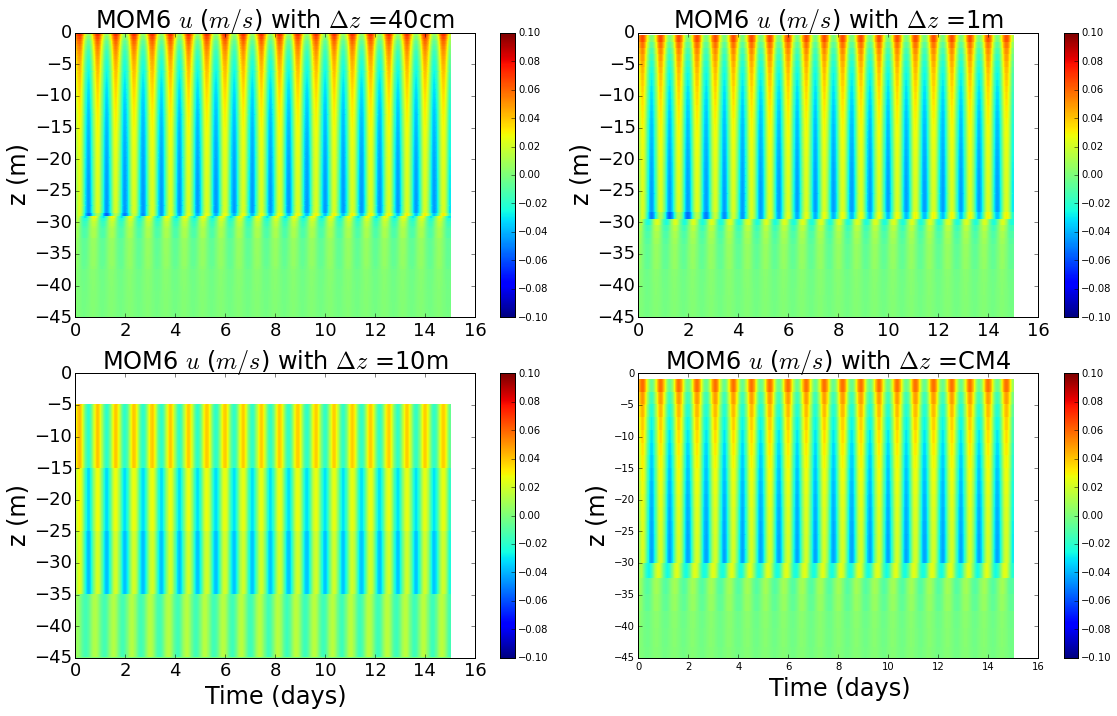

In [6]:
fig, ax = plt.subplots(figsize=(16, 10), dpi=dpi)

plt.subplot(221)
data   = u_A
field  = np.ma.masked_array(data, mask=[data==0.])
depths = zl_A
deltaz = deltaz_A 
CS = plt.pcolormesh(time, -depths, field.T, vmin=-.1, vmax=0.1)
plt.colorbar()
plt.ylim((ymin,0))
plt.ylabel('z (m)',fontsize=24)
plt.title(r'MOM6 $u$ ($m/s$) with $\Delta z$ ='+deltaz,fontsize=24);
plot = fig.add_subplot(221)
plot.tick_params(axis='both', which='major', labelsize=18)
plot.tick_params(axis='both', which='minor', labelsize=18)


plt.subplot(222)
data   = u_B
field  = np.ma.masked_array(data, mask=[data==0.])
depths = zl_B
deltaz = deltaz_B
CS = plt.pcolormesh(time, -depths, field.T, vmin=-.1, vmax=0.1)
plt.colorbar()
plt.ylim((ymin,0))
plt.ylabel('z (m)',fontsize=24)
plt.title(r'MOM6 $u$ ($m/s$) with $\Delta z$ ='+deltaz,fontsize=24);
plot = fig.add_subplot(222)
plot.tick_params(axis='both', which='major', labelsize=18)
plot.tick_params(axis='both', which='minor', labelsize=18)


plt.subplot(223)
data   = u_C
field  = np.ma.masked_array(data, mask=[data==0.])
depths = zl_C
deltaz = deltaz_C
CS = plt.pcolormesh(time, -depths, field.T, vmin=-.1, vmax=0.1)
plt.colorbar()
plt.ylim((ymin,0))
plt.ylabel('z (m)',fontsize=24)
plt.title(r'MOM6 $u$ ($m/s$) with $\Delta z$ ='+deltaz,fontsize=24)
plt.xlabel('Time (days)',fontsize=24);
plot = fig.add_subplot(223)
plot.tick_params(axis='both', which='major', labelsize=18)
plot.tick_params(axis='both', which='minor', labelsize=18)


plt.subplot(224)
data   = u_D
field  = np.ma.masked_array(data, mask=[data==0.])
depths = zl_D
deltaz = deltaz_D
CS = plt.pcolormesh(time, -depths, field.T, vmin=-.1, vmax=0.1)
plt.colorbar()
plt.ylim((ymin,0))
plt.ylabel('z (m)',fontsize=24)
plt.title(r'MOM6 $u$ ($m/s$) with $\Delta z$ ='+deltaz,fontsize=24)
plt.xlabel('Time (days)',fontsize=24);
plot = fig.add_subplot(223)
plot.tick_params(axis='both', which='major', labelsize=18)
plot.tick_params(axis='both', which='minor', labelsize=18)



plt.tight_layout()
fname = expt_name+'_MOM6_zonal_velocity.png'
fig.savefig(fname,dpi=dpi);

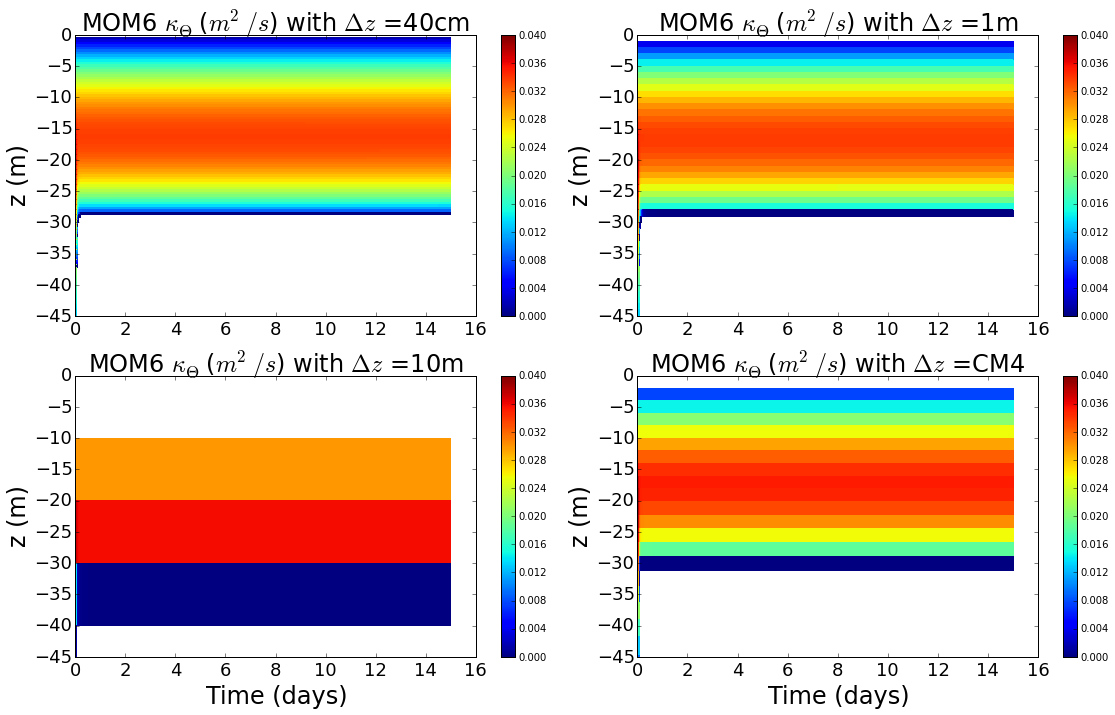

In [7]:
# diffusivity  

figure(1)
fig = plt.figure(figsize=(16,10), dpi=dpi)

plt.subplot(221)
data   = Kt_A
field  = np.ma.masked_array(data, mask=[data==0.])
depths = zi_A
deltaz = deltaz_A 
CS = plt.pcolormesh(time, -depths, field.T, vmin=0.0, vmax=0.04)
plt.colorbar()
plt.ylim((ymin,0))
plt.ylabel('z (m)',fontsize=24)
plt.title(r'MOM6 $\kappa_{\Theta}$ ($m^2/s$) with $\Delta z$ ='+deltaz,fontsize=24);
plot = fig.add_subplot(221)
plot.tick_params(axis='both', which='major', labelsize=18)
plot.tick_params(axis='both', which='minor', labelsize=18)


plt.subplot(222)
data   = Kt_B
field  = np.ma.masked_array(data, mask=[data==0.])
depths = zi_B
deltaz = deltaz_B
CS = plt.pcolormesh(time, -depths, field.T, vmin=0.0, vmax=0.04)
plt.colorbar()
plt.ylim((ymin,0))
plt.ylabel('z (m)',fontsize=24)
plt.title(r'MOM6 $\kappa_{\Theta}$ ($m^2/s$) with $\Delta z$ ='+deltaz,fontsize=24);
plot = fig.add_subplot(222)
plot.tick_params(axis='both', which='major', labelsize=18)
plot.tick_params(axis='both', which='minor', labelsize=18)


plt.subplot(223)
data   = Kt_C
field  = np.ma.masked_array(data, mask=[data==0.])
depths = zi_C
deltaz = deltaz_C
CS = plt.pcolormesh(time, -depths, field.T, vmin=0.0, vmax=0.04)
plt.colorbar()
plt.ylim((ymin,0))
plt.ylabel('z (m)',fontsize=24)
plt.title(r'MOM6 $\kappa_{\Theta}$ ($m^2/s$) with $\Delta z$ ='+deltaz,fontsize=24)
plt.xlabel('Time (days)',fontsize=24);
plot = fig.add_subplot(223)
plot.tick_params(axis='both', which='major', labelsize=18)
plot.tick_params(axis='both', which='minor', labelsize=18)


plt.subplot(224)
data   = Kt_D
field  = np.ma.masked_array(data, mask=[data==0.])
depths = zi_D
deltaz = deltaz_D
CS = plt.pcolormesh(time, -depths, field.T, vmin=0.0, vmax=0.04)
plt.colorbar()
plt.ylim((ymin,0))
plt.ylabel('z (m)',fontsize=24)
plt.title(r'MOM6 $\kappa_{\Theta}$ ($m^2/s$) with $\Delta z$ ='+deltaz,fontsize=24)
plt.xlabel('Time (days)',fontsize=24);
plot = fig.add_subplot(224)
plot.tick_params(axis='both', which='major', labelsize=18)
plot.tick_params(axis='both', which='minor', labelsize=18)


plt.tight_layout()
fname = expt_name+'_MOM6_EPBL_diffusivity.png'
fig.savefig(fname,dpi=dpi);



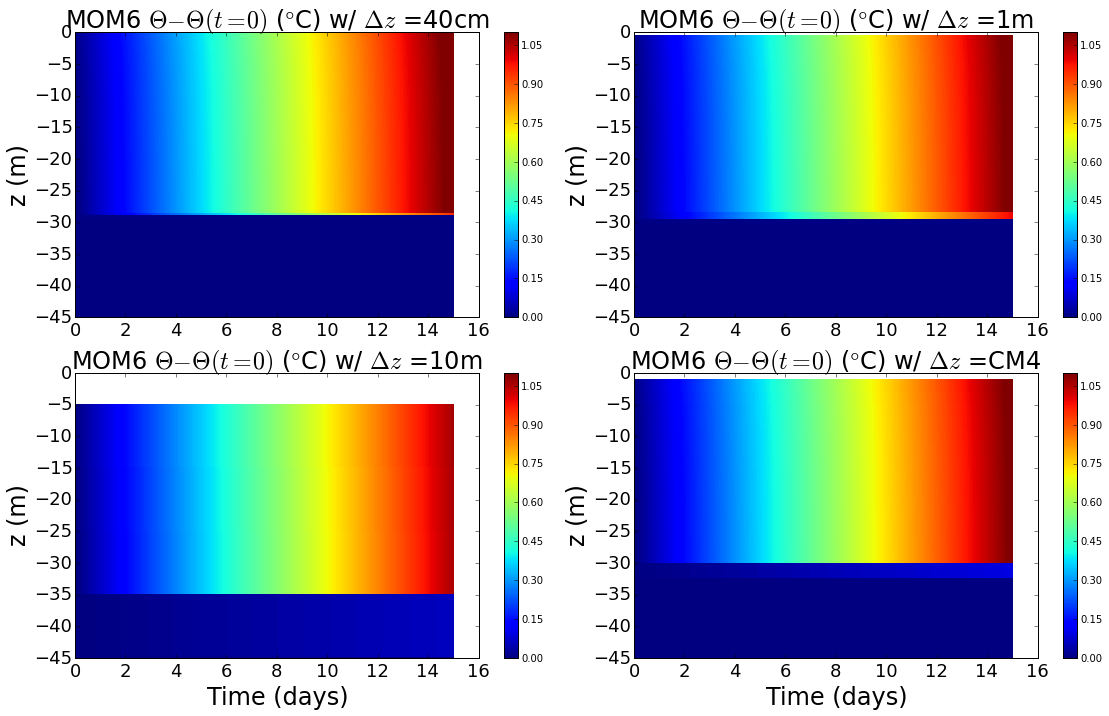

In [8]:
# temperature drift

figure(1)
fig = plt.figure(figsize=(16,10), dpi=dpi)

plt.subplot(221)
data   = temp_A[:,:] - temp_A[0,:]
field  = np.ma.masked_array(data, mask=[data==0.])
depths = zl_A
deltaz = deltaz_A
CS = plt.pcolormesh(time, -depths, field.T, vmin=0, vmax=1.1)
plt.colorbar()
#C = plt.contour(time, -depths, field.T, 8, linewidth=.05, colors='black')
plt.ylim((ymin,0))
plt.ylabel('z (m)',fontsize=24)
plt.title(r'MOM6 $\Theta-\Theta(t=0)$ ($\degree$C) w/ $\Delta z$ ='+deltaz,fontsize=24);
plot = fig.add_subplot(221)
plot.tick_params(axis='both', which='major', labelsize=18)
plot.tick_params(axis='both', which='minor', labelsize=18)

plt.subplot(222)
data   = temp_B[:,:] - temp_B[0,:]
field  = np.ma.masked_array(data, mask=[data==0.])
depths = zl_B
deltaz = deltaz_B
CS = plt.pcolormesh(time, -depths, field.T, vmin=0, vmax=1.1)
plt.colorbar()
#C = plt.contour(time, -depths, field.T, 8, linewidth=.05, colors='black')
plt.ylim((ymin,0))
plt.ylabel('z (m)',fontsize=24)
plt.title(r'MOM6 $\Theta-\Theta(t=0)$ ($\degree$C) w/ $\Delta z$ ='+deltaz,fontsize=24);
plot = fig.add_subplot(222)
plot.tick_params(axis='both', which='major', labelsize=18)
plot.tick_params(axis='both', which='minor', labelsize=18)

plt.subplot(223)
data   = temp_C[:,:] - temp_C[0,:]
field  = np.ma.masked_array(data, mask=[data==0.])
depths = zl_C
deltaz = deltaz_C
CS = plt.pcolormesh(time, -depths, field.T, vmin=0, vmax=1.1)
plt.colorbar()
#C = plt.contour(time, -depths, field.T, 8, linewidth=.05, colors='black')
plt.ylim((ymin,0))
plt.ylabel('z (m)',fontsize=24)
plt.xlabel('Time (days)',fontsize=24)
plt.title(r'MOM6 $\Theta-\Theta(t=0)$ ($\degree$C) w/ $\Delta z$ ='+deltaz,fontsize=24);
plot = fig.add_subplot(223)
plot.tick_params(axis='both', which='major', labelsize=18)
plot.tick_params(axis='both', which='minor', labelsize=18)

plt.subplot(224)
data   = temp_D[:,:] - temp_D[0,:]
field  = np.ma.masked_array(data, mask=[data==0.])
depths = zl_D
deltaz = deltaz_D
CS = plt.pcolormesh(time, -depths, field.T, vmin=0, vmax=1.1)
plt.colorbar()
#C = plt.contour(time, -depths, field.T, 8, linewidth=.05, colors='black')
plt.ylim((ymin,0))
plt.ylabel('z (m)',fontsize=24)
plt.xlabel('Time (days)',fontsize=24)
plt.title(r'MOM6 $\Theta-\Theta(t=0)$ ($\degree$C) w/ $\Delta z$ ='+deltaz,fontsize=24);
plot = fig.add_subplot(224)
plot.tick_params(axis='both', which='major', labelsize=18)
plot.tick_params(axis='both', which='minor', labelsize=18)

plt.tight_layout()
fname = expt_name+'_MOM6_temp_drift.png'
fig.savefig(fname,dpi=dpi);



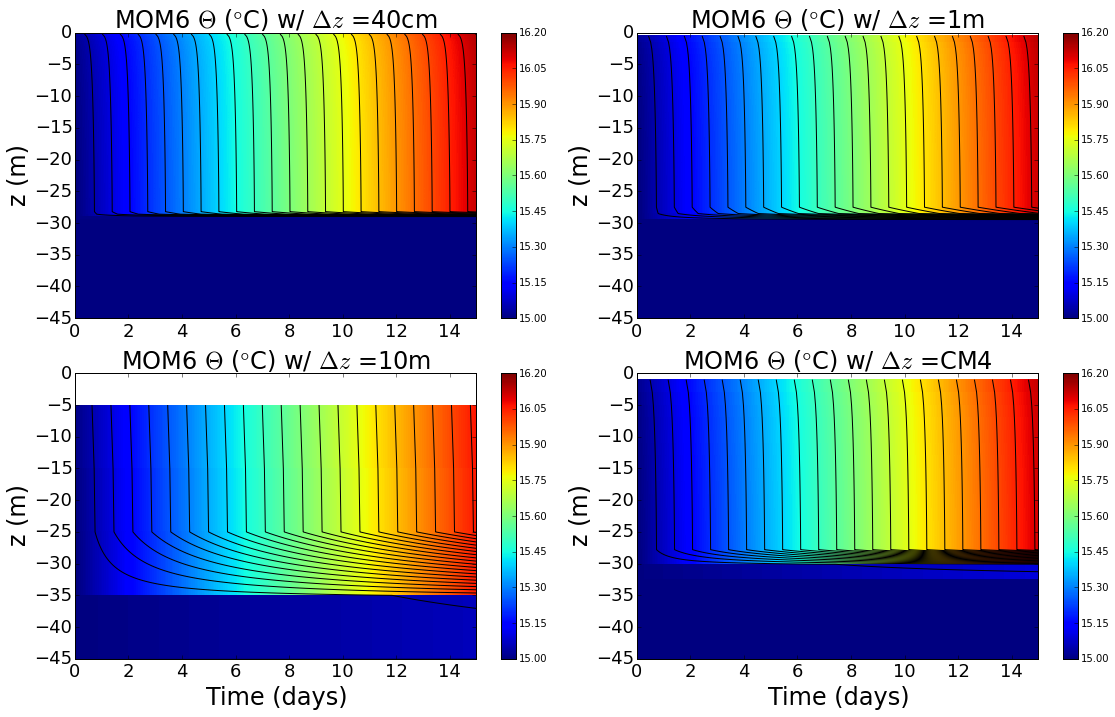

In [9]:
# temperature 

figure(1)
fig = plt.figure(figsize=(16,10), dpi=dpi)

plt.subplot(221)
field = temp_A[:,:]
depths = zl_A
deltaz = deltaz_A
CS = plt.pcolormesh(time, -depths, field.T, vmin=15, vmax=16.2)
plt.colorbar()
C = plt.contour(time, -depths, field.T, levels=numpy.arange(13,17,.05), linewidth=.5, colors='black')
plt.ylim((ymin,0))
plt.ylabel('z (m)',fontsize=24)
plt.title(r'MOM6 $\Theta$ ($\degree$C) w/ $\Delta z$ ='+deltaz,fontsize=24);
plot = fig.add_subplot(221)
plot.tick_params(axis='both', which='major', labelsize=18)
plot.tick_params(axis='both', which='minor', labelsize=18)


plt.subplot(222)
field = temp_B[:,:]
depths = zl_B
deltaz = deltaz_B
CS = plt.pcolormesh(time, -depths, field.T, vmin=15, vmax=16.2)
plt.colorbar()
C = plt.contour(time, -depths, field.T, levels=numpy.arange(10,17,.05), linewidth=.5, colors='black')
plt.ylim((ymin,0))
plt.ylabel('z (m)',fontsize=24)
plt.title(r'MOM6 $\Theta$ ($\degree$C) w/ $\Delta z$ ='+deltaz,fontsize=24);
plot = fig.add_subplot(222)
plot.tick_params(axis='both', which='major', labelsize=18)
plot.tick_params(axis='both', which='minor', labelsize=18)


plt.subplot(223)
field = temp_C[:,:]
depths = zl_C
deltaz = deltaz_C
CS = plt.pcolormesh(time, -depths, field.T, vmin=15, vmax=16.2)
#CS = plt.pcolormesh(time, -depths, field.T)
plt.colorbar()
C = plt.contour(time, -depths, field.T, levels=numpy.arange(10,17,.05), linewidth=.5, colors='black')
plt.ylim((ymin,0))
plt.xlabel('Time (days)',fontsize=24)
plt.ylabel('z (m)',fontsize=24)
plt.title(r'MOM6 $\Theta$ ($\degree$C) w/ $\Delta z$ ='+deltaz,fontsize=24);
plot = fig.add_subplot(223)
plot.tick_params(axis='both', which='major', labelsize=18)
plot.tick_params(axis='both', which='minor', labelsize=18)


plt.subplot(224)
field = temp_D[:,:]
depths = zl_D
deltaz = deltaz_D
CS = plt.pcolormesh(time, -depths, field.T, vmin=15, vmax=16.2)
plt.colorbar()
C = plt.contour(time, -depths, field.T, levels=numpy.arange(10,17,.05), linewidth=.5, colors='black')
plt.ylim((ymin,0))
plt.xlabel('Time (days)',fontsize=24)
plt.ylabel('z (m)',fontsize=24)
plt.title(r'MOM6 $\Theta$ ($\degree$C) w/ $\Delta z$ ='+deltaz,fontsize=24);
plot = fig.add_subplot(224)
plot.tick_params(axis='both', which='major', labelsize=18)
plot.tick_params(axis='both', which='minor', labelsize=18)



plt.tight_layout()
fname = expt_name+'_MOM6_temp.png'
fig.savefig(fname,dpi=dpi);


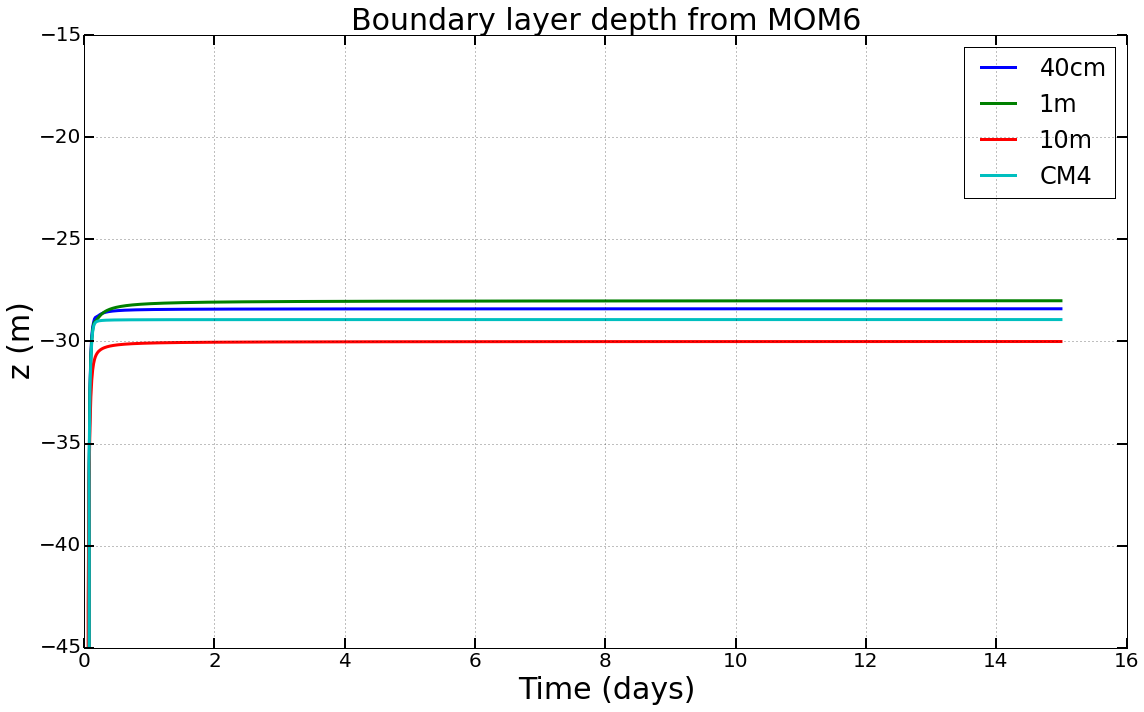

In [10]:
# Boundary layer depth

figure(1)
fig, ax = plt.subplots(figsize=(16, 10), dpi=dpi)

field = h_A
CS = plt.plot(time, -field,'-',linewidth=3, label=deltaz_A)
field = h_B
CS = plt.plot(time, -field,'-',linewidth=3, label=deltaz_B)
field = h_C
CS = plt.plot(time, -field,'-',linewidth=3, label=deltaz_C)
field = h_D
CS = plt.plot(time, -field,'-',linewidth=3, label=deltaz_D)
ax.legend(fontsize=24)

ax.tick_params('both', length=10, width=2, which='major',labelsize=20)
ax.tick_params('both', length=10, width=2, which='minor',labelsize=20)
plt.ylim((-45,-15))

plt.grid()
plt.xlabel('Time (days)',fontsize=30)
plt.ylabel('z (m)',fontsize=30)
plt.title(r'Boundary layer depth from MOM6',fontsize=30)
#ax.set_yticklabels(["$%.1f$" % y for y in yticks], fontsize=30)
#ax.set_xticklabels(["$%.1f$" % x for x in xticks], fontsize=30);

plt.tight_layout()
fname = expt_name+'_MOM6_bldepth.png'
fig.savefig(fname,dpi=dpi);



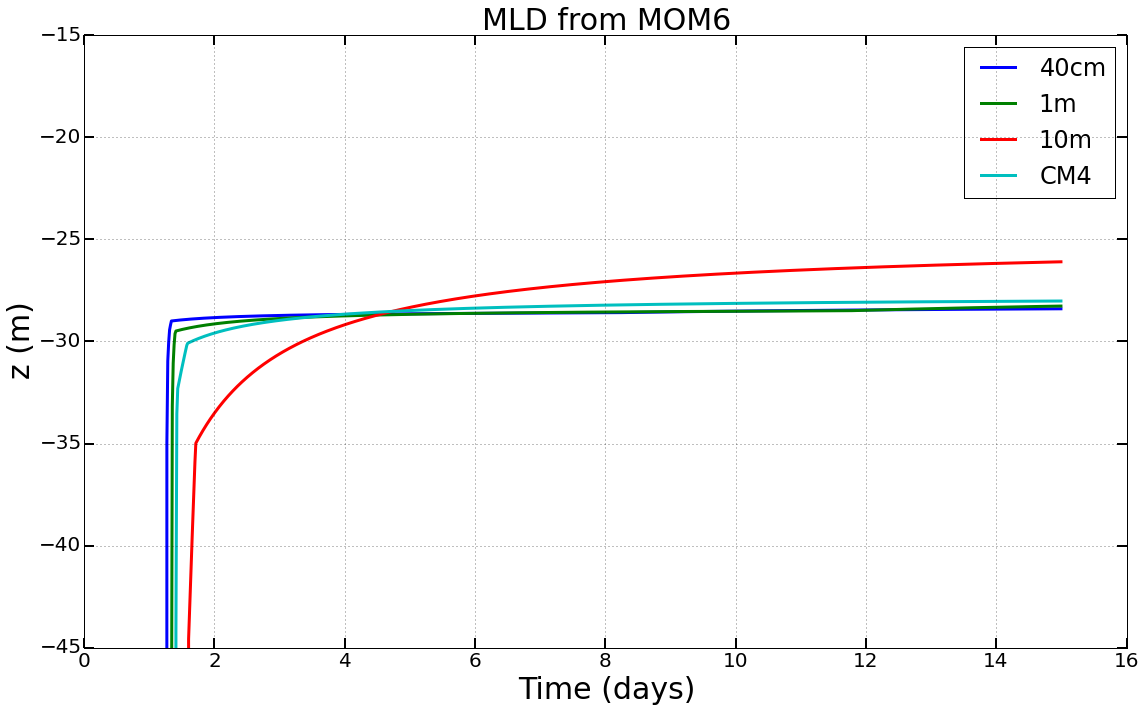

In [11]:
# Mixed layer depth

figure(1)
fig, ax = plt.subplots(figsize=(16, 10), dpi=dpi)

field = mld_A
CS = plt.plot(time, -field,'-',linewidth=3, label=deltaz_A)
field = mld_B
CS = plt.plot(time, -field,'-',linewidth=3, label=deltaz_B)
field = mld_C
CS = plt.plot(time, -field,'-',linewidth=3, label=deltaz_C)
field = mld_D
CS = plt.plot(time, -field,'-',linewidth=3, label=deltaz_D)
ax.legend(fontsize=24)

ax.tick_params('both', length=10, width=2, which='major',labelsize=20)
ax.tick_params('both', length=10, width=2, which='minor',labelsize=20)
plt.ylim((-45,-15))

plt.grid()
plt.xlabel('Time (days)',fontsize=30)
plt.ylabel('z (m)',fontsize=30)
plt.title(r'MLD from MOM6',fontsize=30)
#ax.set_yticklabels(["$%.1f$" % y for y in yticks], fontsize=30)
#ax.set_xticklabels(["$%.1f$" % x for x in xticks], fontsize=30);

plt.tight_layout()
fname = expt_name+'_MOM6_mld.png'
fig.savefig(fname,dpi=dpi);



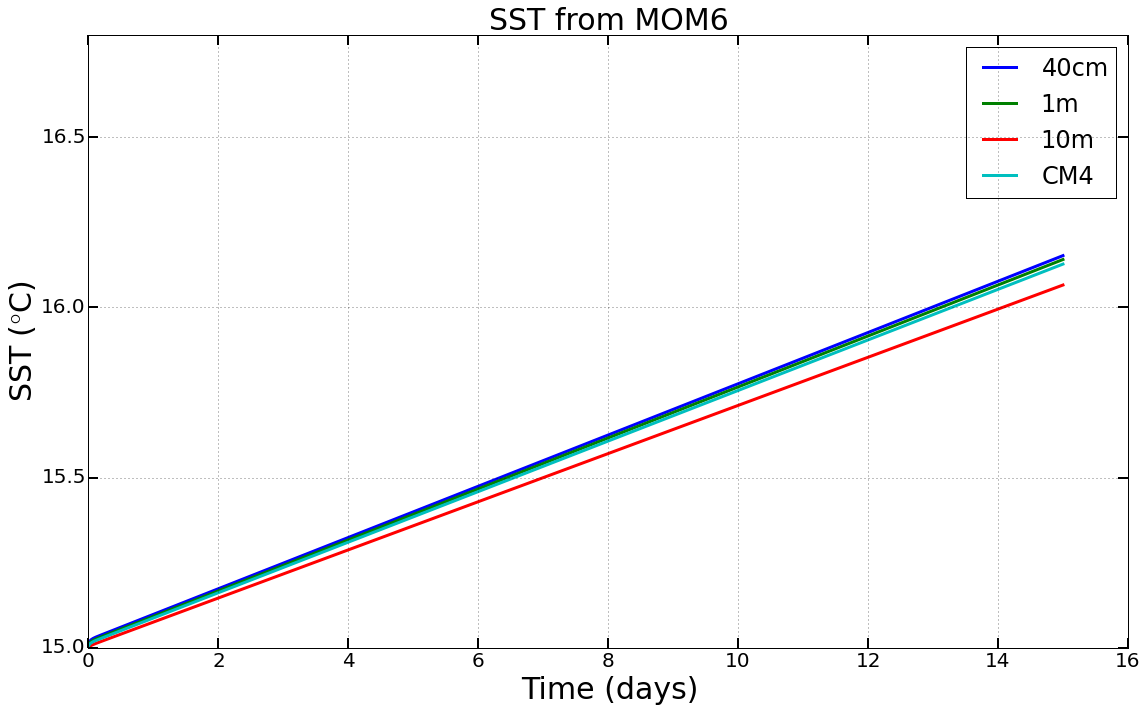

In [12]:
# SST

figure(1)
fig, ax = plt.subplots(figsize=(16, 10), dpi=dpi)

field = temp_A[:,0]
CS = plt.plot(time, field,'-',linewidth=3, label=deltaz_A)
field = temp_B[:,0]
CS = plt.plot(time, field,'-',linewidth=3, label=deltaz_B)
field = temp_C[:,0]
CS = plt.plot(time, field,'-',linewidth=3, label=deltaz_C)
field = temp_D[:,0]
CS = plt.plot(time, field,'-',linewidth=3, label=deltaz_D)

ax.legend(fontsize=24,loc='upper right')

ax.tick_params('both', length=10, width=2, which='major',labelsize=20)
ax.tick_params('both', length=10, width=2, which='minor',labelsize=20)
plt.ylim((15,16.8))

plt.grid()
plt.ylabel(r'SST ($\degree$C)',fontsize=30)
plt.xlabel('Time (days)',fontsize=30)
plt.title(r'SST from MOM6',fontsize=30)

plt.tight_layout()
fname = expt_name+'_MOM6_SST.png'
fig.savefig(fname,dpi=dpi);

